# Подключение данных и подключение библиотек


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Кейс 1: Аналитика тренажера ЕГЭ/inf_ege_data.csv",
                 dtype={'attempts_cnt': 'UInt32', 'hints_cnt': 'UInt32'},
                 parse_dates=['date'])

# Анализ данных и вывод из полученных данных

In [ ]:
data.head(10)

,date,attempts_cnt,difficulty,flow_type,hints_cnt,is_correct,task_id,task_number,user_id
0,2024-03-26,<NA>,4,variant,<NA>,False,73,1,184921
1,2024-03-26,<NA>,4,variant,<NA>,False,73,1,361
2,2024-03-26,<NA>,4,variant,<NA>,False,73,1,40784
3,2024-03-26,<NA>,4,variant,<NA>,False,73,1,124954
4,2024-03-26,<NA>,4,variant,<NA>,False,73,1,119665
5,2024-03-26,<NA>,4,variant,<NA>,False,73,1,42220
6,2024-03-26,<NA>,4,variant,<NA>,False,73,1,94746
7,2024-03-26,<NA>,4,variant,<NA>,False,73,1,23294
8,2024-03-26,<NA>,4,variant,<NA>,False,73,1,196684
9,2024-03-26,<NA>,4,variant,<NA>,False,73,1,165775


## DAU

In [ ]:
dau = data.groupby(data['date'].dt.date)['user_id'].nunique().reset_index(name='DAU')

dau

,date,DAU
0,2023-11-01,508
1,2023-11-02,617
2,2023-11-03,514
3,2023-11-04,331
4,2023-11-05,247
...,...,...
238,2024-06-26,626
239,2024-06-27,542
240,2024-06-28,445
241,2024-06-29,443


In [ ]:
dau.DAU.max()

6159

## WAU

In [ ]:
wau = data.set_index('date').resample('W')['user_id'].nunique().reset_index(name='WAU')

In [ ]:
# inf_data['week'] = inf_data['date'] - pd.to_timedelta(inf_data['date'].dt.weekday, unit='D')

# inf_data

,date,attempts_cnt,difficulty,flow_type,hints_cnt,is_correct,task_id,task_number,user_id,weekday,week
0,2024-03-26,<NA>,4,variant,<NA>,False,73,1,184921,1,2024-03-25
1,2024-03-26,<NA>,4,variant,<NA>,False,73,1,361,1,2024-03-25
2,2024-03-26,<NA>,4,variant,<NA>,False,73,1,40784,1,2024-03-25
3,2024-03-26,<NA>,4,variant,<NA>,False,73,1,124954,1,2024-03-25
4,2024-03-26,<NA>,4,variant,<NA>,False,73,1,119665,1,2024-03-25
...,...,...,...,...,...,...,...,...,...,...,...
2573733,2024-03-26,<NA>,4,variant,<NA>,False,73,1,73837,1,2024-03-25
2573734,2024-03-26,<NA>,4,variant,<NA>,False,73,1,188958,1,2024-03-25
2573735,2024-03-26,<NA>,4,variant,<NA>,False,73,1,154130,1,2024-03-25
2573736,2024-03-26,<NA>,4,variant,<NA>,False,73,1,53618,1,2024-03-25


In [ ]:
wau.WAU.max()

14665

## MAU

In [ ]:
mau = data.set_index('date').resample('M')['user_id'].nunique().reset_index(name='MAU')

In [ ]:
mau.MAU.max()

31917

## Визуализация ключевых метрик

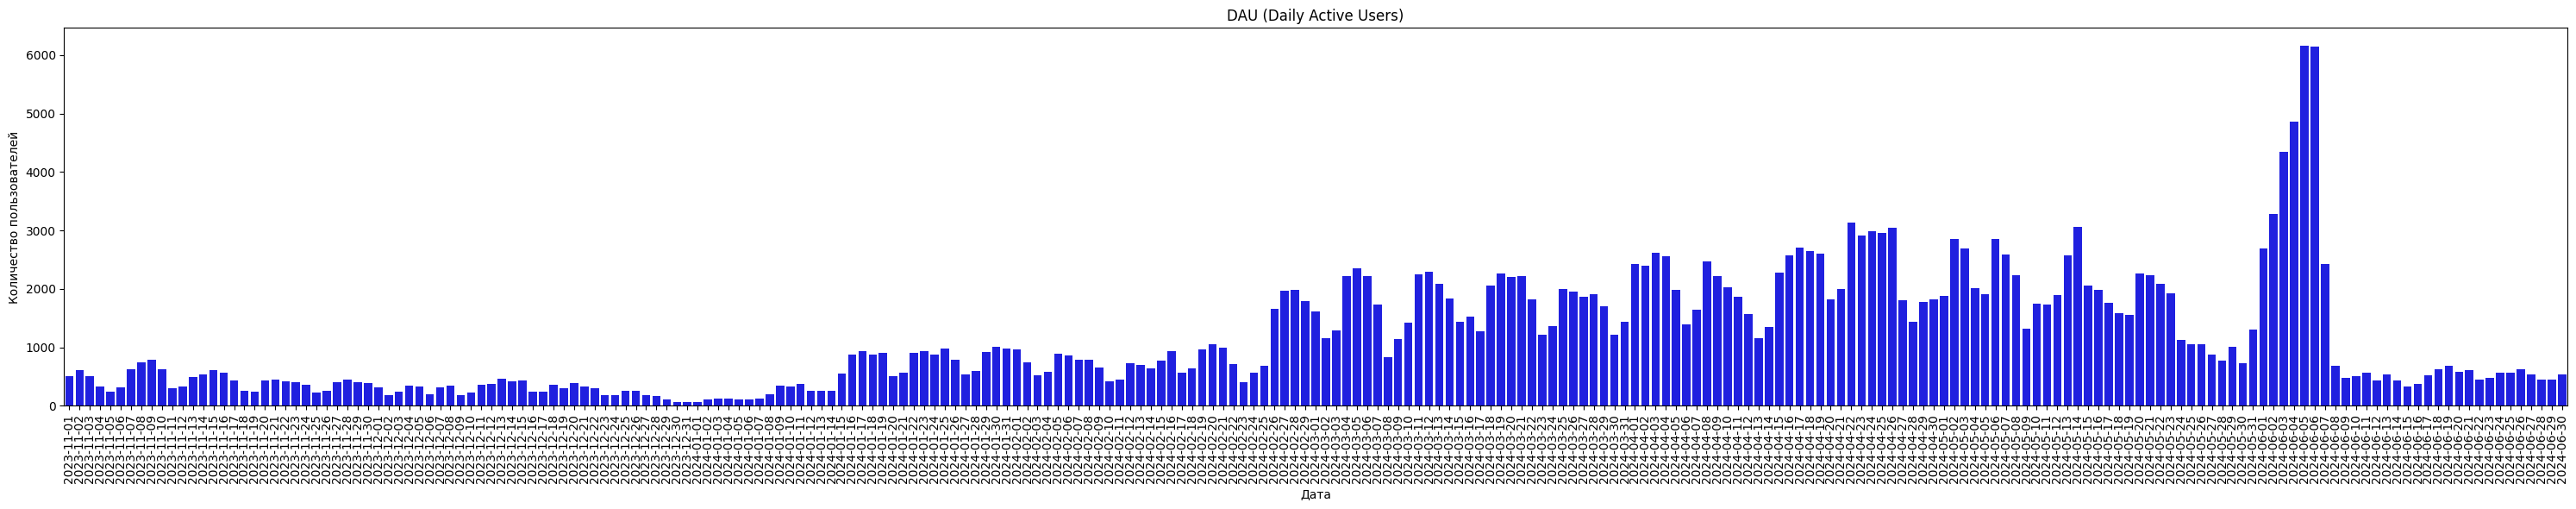

In [72]:
# DAU

plt.figure(figsize=(30, 6))

sns.barplot(x=dau['date'], y=dau['DAU'], color='blue')
plt.xticks(rotation=90)
plt.title('DAU (Daily Active Users)')
plt.ylabel('Количество пользователей')
plt.xlabel('Дата')

plt.tight_layout()
plt.show()



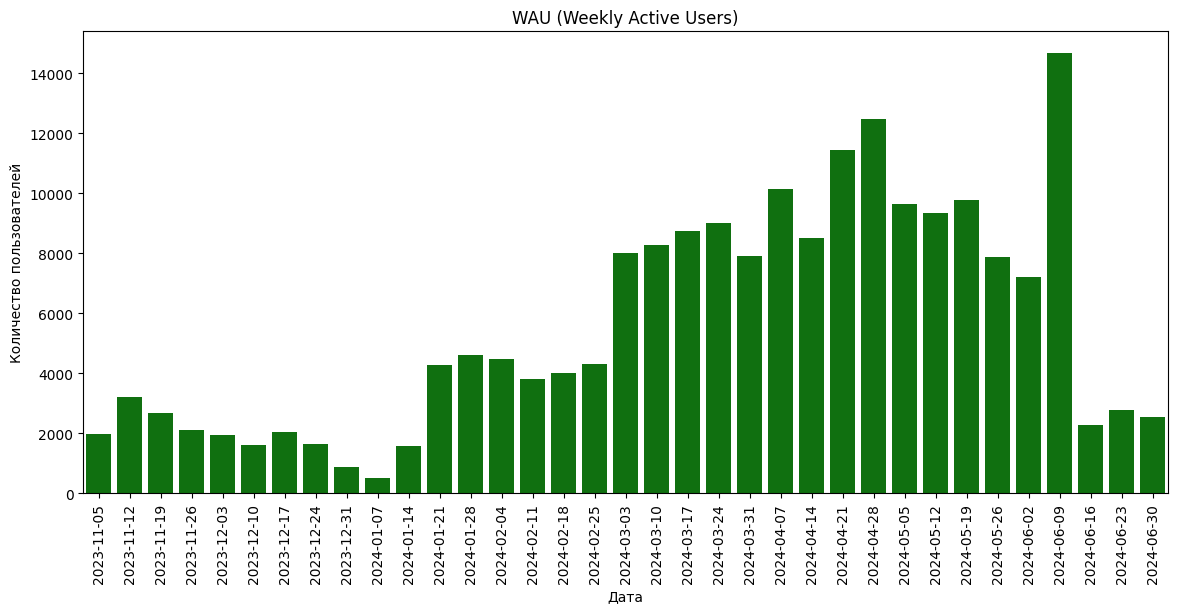

In [ ]:
# WAU

plt.figure(figsize=(14, 6))

sns.barplot(x=wau['date'], y=wau['WAU'], color='green')
plt.xticks(rotation=90)
plt.title('WAU (Weekly Active Users)')
plt.ylabel('Количество пользователей')
plt.xlabel('Дата')

plt.show()

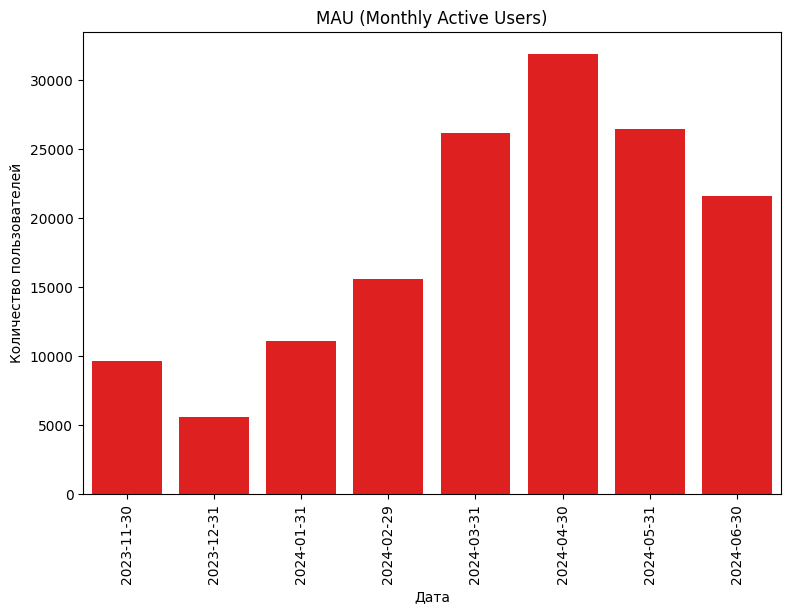

In [ ]:
# MAU

plt.figure(figsize=(9, 6))

sns.barplot(x=mau['date'], y=mau['MAU'], color='red')
plt.xticks(rotation=90)
plt.title('MAU (Monthly Active Users)')
plt.ylabel('Количество пользователей')
plt.xlabel('Дата')


plt.show()


##  Анализ активности по типу задачи

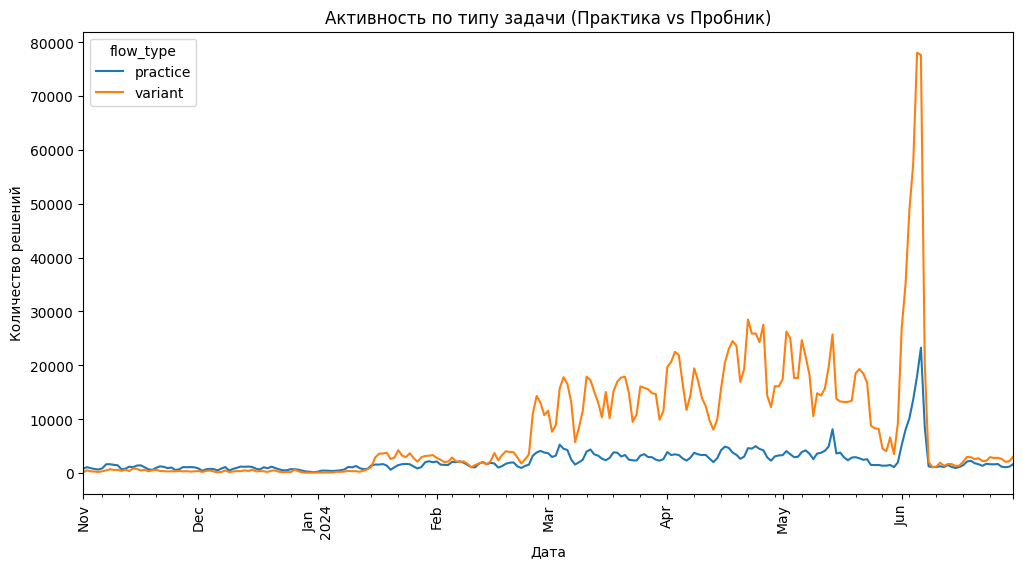

In [ ]:
flow_activity = data.groupby(['date', 'flow_type']).size().unstack(fill_value=0)

# Визуализация
flow_activity.plot(kind='line', figsize=(12, 6))
plt.title('Активность по типу задачи (Практика vs Пробник)')
plt.ylabel('Количество решений')
plt.xlabel('Дата')
plt.xticks(rotation=90)
plt.show()

## Анализ выбора конкретного номера


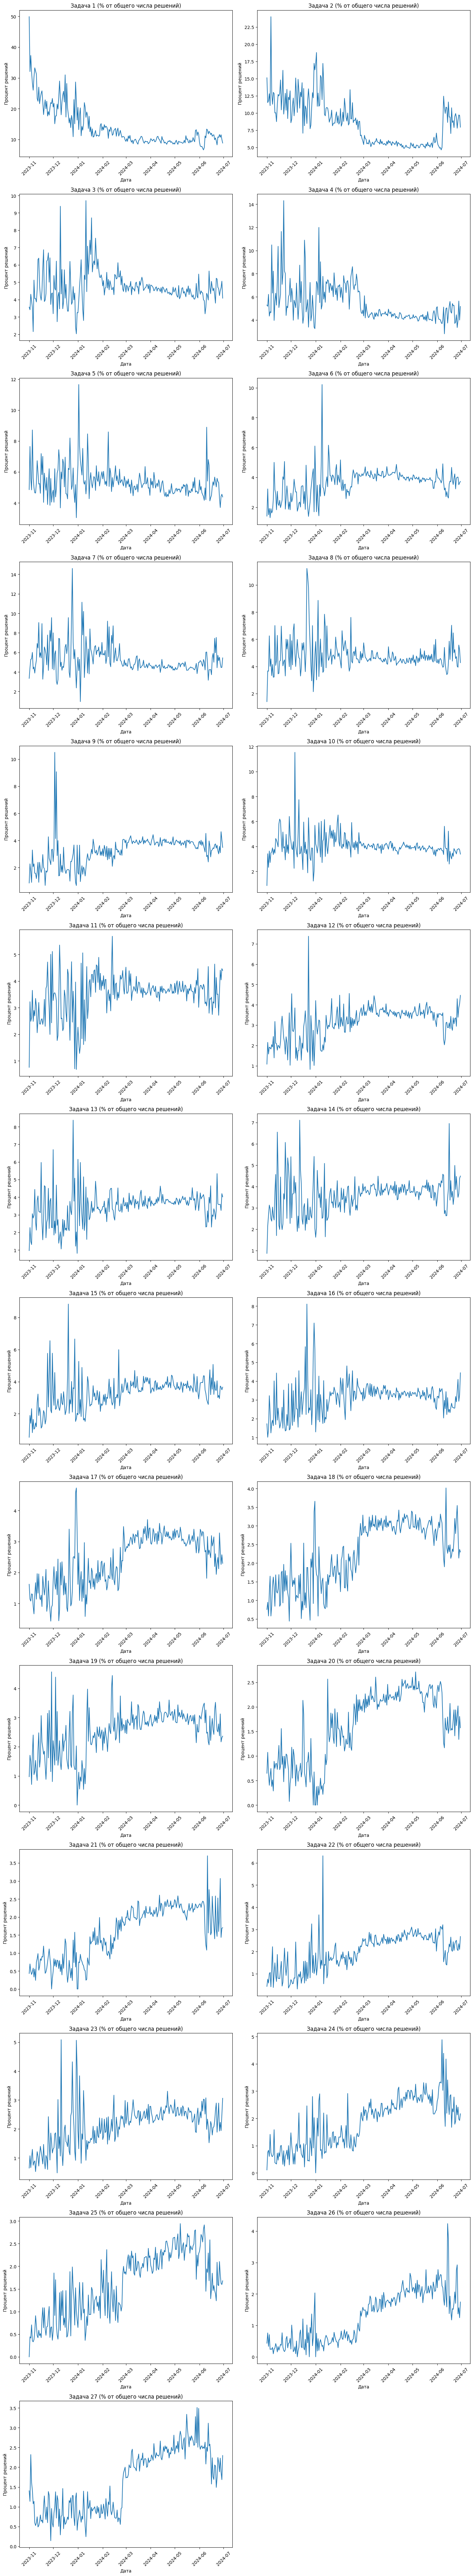

In [ ]:
task_activity = data.groupby(['date', 'task_number']).size().unstack(fill_value=0)

# Подсчёт общего количества запросов всех задач по каждому дню
total_activity_per_day = task_activity.sum(axis=1)

# Вычисление процента для каждой задачи относительно общего числа решений по дням
task_activity_percent = task_activity.div(total_activity_per_day, axis=0) * 100

# Определение количества задач
task_numbers = task_activity_percent.columns

# Настройки для графиков
num_tasks = len(task_numbers)
fig, axes = plt.subplots(nrows=num_tasks//2 + num_tasks%2, ncols=2, figsize=(15, num_tasks * 3))

# Визуализация активности для каждой задачи в процентах относительно общего количества запросов по дням
for i, task_number in enumerate(task_numbers):
    ax = axes[i // 2, i % 2]
    sns.lineplot(x=task_activity_percent.index, y=task_activity_percent[task_number], ax=ax)
    ax.set_title(f'Задача {task_number} (% от общего числа решений)')
    ax.set_ylabel('Процент решений')
    ax.set_xlabel('Дата')
    ax.tick_params(axis='x', rotation=45)

# Убираем пустые подграфики, если задач нечетное количество
if num_tasks % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

## Анализ использования подсказок

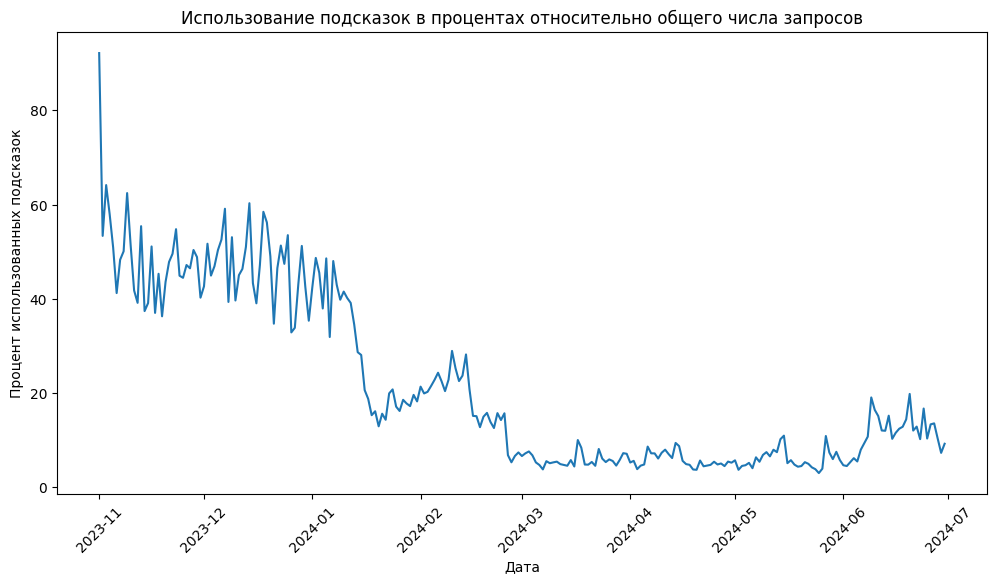

In [ ]:
# Группировка данных по дате и подсчёт общего количества запросов по каждому дню
total_activity_per_day = data.groupby(data['date'].dt.date).size()

# Группировка данных по дате и подсчёт общего количества использованных подсказок за день
hints_per_day = data.groupby(data['date'].dt.date)['hints_cnt'].sum()

# Вычисление процента использованных подсказок от общего количества запросов по дням
hints_percent = (hints_per_day / total_activity_per_day) * 100

# Визуализация использования подсказок в процентах
plt.figure(figsize=(12, 6))
sns.lineplot(x=hints_percent.index, y=hints_percent)
plt.title('Использование подсказок в процентах относительно общего числа запросов')
plt.ylabel('Процент использованных подсказок')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.show()

## Анализ успешных ответов относительно общего количества решений

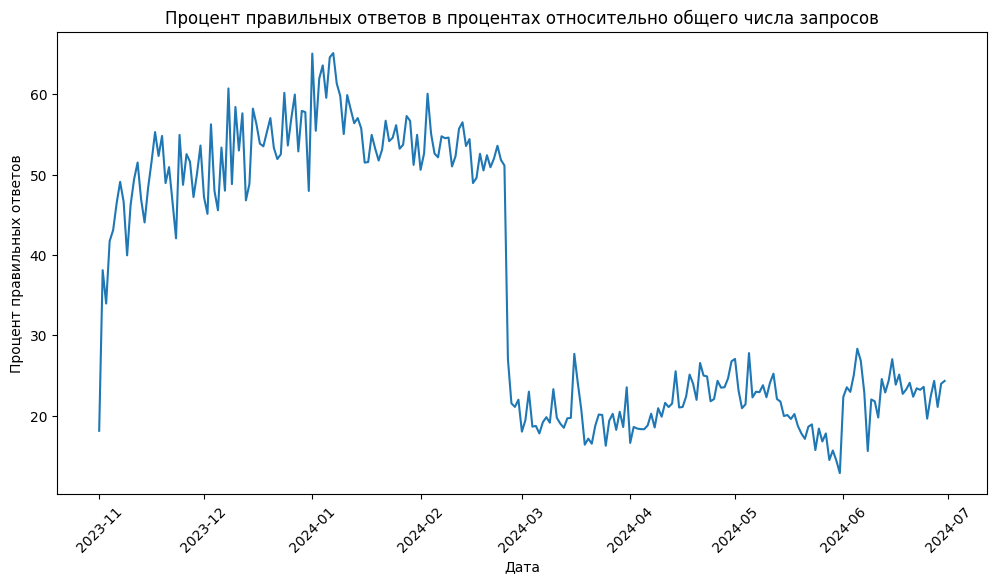

In [87]:
# Группировка данных по дате и подсчёт общего количества запросов по каждому дню
total_activity_per_day = data.groupby(data['date'].dt.date).size()


correct_per_day = data[data['is_correct']==True].groupby(data['date'].dt.date)['is_correct'].sum()


correct_percent = (correct_per_day / total_activity_per_day) * 100

plt.figure(figsize=(12, 6))
sns.lineplot(x=correct_percent.index, y=correct_percent)
plt.title('Процент правильных ответов в процентах относительно общего числа запросов')
plt.ylabel('Процент правильных ответов')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.show()

## Анализ по сложности

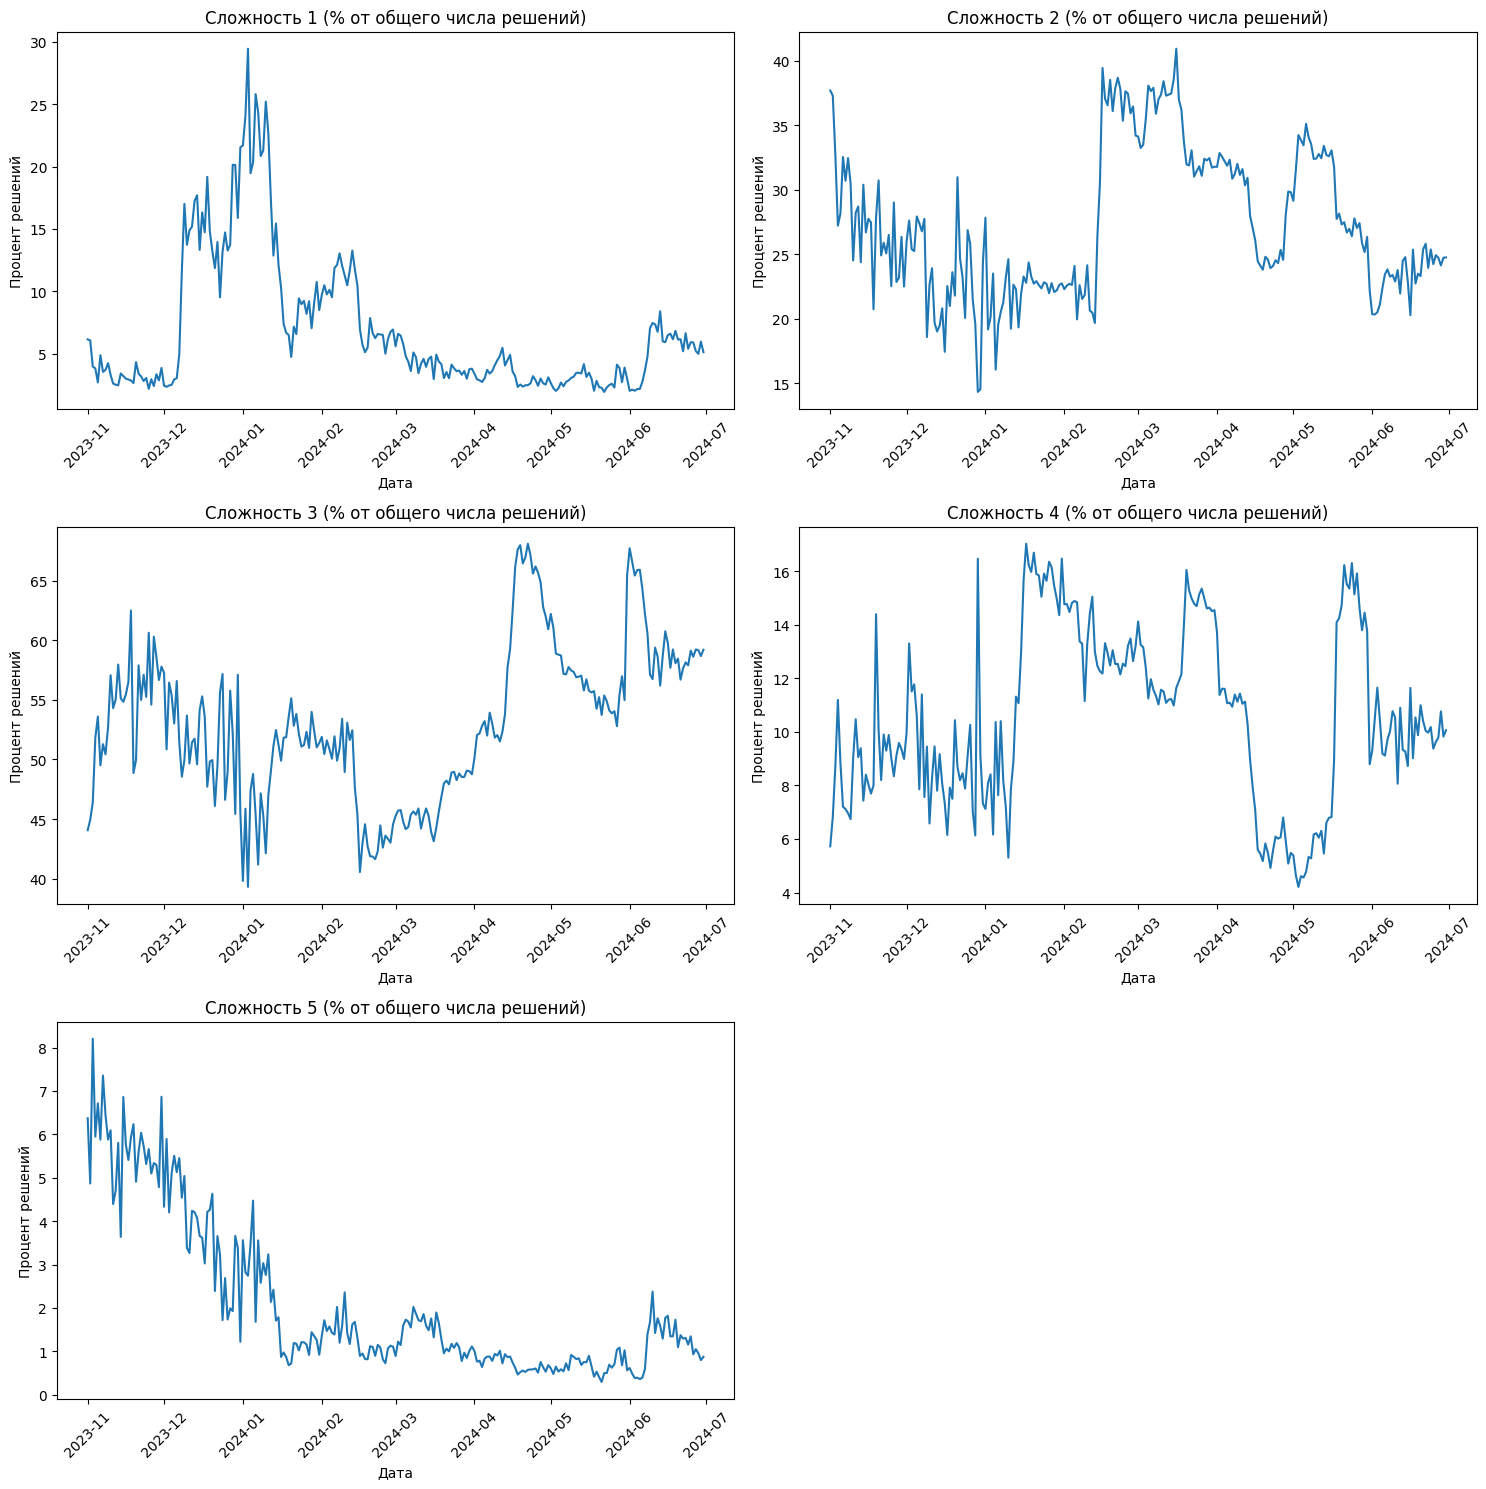

In [101]:
difficulty_activity = data.groupby(['date', 'difficulty']).size().unstack(fill_value=0)

# Подсчёт общего количества запросов всех задач по каждому дню
total_activity_per_day = difficulty_activity.sum(axis=1)

# Вычисление процента для каждой сложности относительно общего числа решений по дням
difficulty_activity_percent = difficulty_activity.div(total_activity_per_day, axis=0) * 100

# Определение количества сложностей
dif_numbers = difficulty_activity_percent.columns

# Настройки для графиков
num_tasks = len(dif_numbers)
fig, axes = plt.subplots(nrows=num_tasks//2 + num_tasks%2, ncols=2, figsize=(15, num_tasks * 3))

# Визуализация активности для каждой сложночти в процентах относительно общего количества запросов по дням
for i, task_number in enumerate(dif_numbers):
    ax = axes[i // 2, i % 2]
    sns.lineplot(x=difficulty_activity_percent.index, y=difficulty_activity_percent[task_number], ax=ax)
    ax.set_title(f'Сложность {task_number} (% от общего числа решений)')
    ax.set_ylabel('Процент решений')
    ax.set_xlabel('Дата')
    ax.tick_params(axis='x', rotation=45)

# Убираем пустые подграфики, если задач нечетное количество
if num_tasks % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()